In [539]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [540]:
#Enter a first name, last name, start date and end date

player0, player1, start, end = input("Enter a current player, start date, and end date(YYYY-MM-DD): ").split()
print("You Selected: ", player0, player1)
print("Start Date : ", start)
print("End Date : ", end)
print()

#Combines the first and last name to a single variable for the "player" argument required in the "get_game_logs"
player = player0 + " " + player1

Enter a current player, start date, and end date(YYYY-MM-DD): James Harden 2012-10-31 2021-01-31
You Selected:  James Harden
Start Date :  2012-10-31
End Date :  2021-01-31



In [541]:
#Gets the stats requested for the player and period of time and displays the df 
stats_df = get_game_logs(player, start, end,) 
(stats_df)

You searched for "James Harden"
11 results found.
0: James Harden
1: James Hardy
2: James Bailey
3: Jimmy Darden
4: Jared Harper
5: James Edwards
6: James Lang
7: James Phelan
8: James Ennis
9: Jaylen Hoard
10: James Thomas
Pick one: 0
Results for James Harden:



,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2012-10-31,23-066,HOU,AWAY,DET,W (+9),1,44:04,14,25,...,5,6,12,4,1,4,2,37,35.2,+18
1,2012-11-02,23-068,HOU,AWAY,ATL,W (+7),1,39:49,14,19,...,6,7,2,0,0,5,3,45,34.2,+17
2,2012-11-03,23-069,HOU,HOME,POR,L (-10),1,40:43,8,24,...,4,6,5,1,1,5,3,24,10.8,-16
3,2012-11-07,23-073,HOU,HOME,DEN,L (-6),1,38:20,5,15,...,2,3,2,5,0,6,1,15,7.0,-6
4,2012-11-09,23-075,HOU,AWAY,MEM,L (-8),1,40:38,4,18,...,2,4,4,0,2,5,1,18,7.4,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2021-01-22,31-149,BRK,AWAY,CLE,L (-12),1,37:03,6,14,...,5,5,11,0,0,3,2,19,16.6,-2
13,2021-01-23,31-150,BRK,HOME,MIA,W (+4),1,38:29,2,9,...,7,7,11,0,0,5,2,12,10.1,+4
14,2021-01-25,31-152,BRK,HOME,MIA,W (+13),1,34:29,7,10,...,4,4,8,1,1,3,0,20,20.5,+8
15,2021-01-27,31-154,BRK,AWAY,ATL,W (+4),1,45:54,9,20,...,5,8,15,2,1,3,1,31,34.0,+2


In [362]:
time = stats_df['MP'].str.split(':', expand=True).astype(int)
time_ = time[1] / 60
stats_df['MINUTES'] = time[0] + time_

stats_df.head(10)

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,MINUTES
0,2012-10-31,23-066,HOU,AWAY,DET,W (+9),1,44:04,14,25,...,6,12,4,1,4,2,37,35.2,+18,44.066667
1,2012-11-02,23-068,HOU,AWAY,ATL,W (+7),1,39:49,14,19,...,7,2,0,0,5,3,45,34.2,+17,39.816667
2,2012-11-03,23-069,HOU,HOME,POR,L (-10),1,40:43,8,24,...,6,5,1,1,5,3,24,10.8,-16,40.716667
3,2012-11-07,23-073,HOU,HOME,DEN,L (-6),1,38:20,5,15,...,3,2,5,0,6,1,15,7.0,-6,38.333333
4,2012-11-09,23-075,HOU,AWAY,MEM,L (-8),1,40:38,4,18,...,4,4,0,2,5,1,18,7.4,-2,40.633333
5,2012-11-10,23-076,HOU,HOME,DET,W (+14),1,35:16,6,14,...,5,2,0,0,5,0,20,10.1,+11,35.266667
6,2012-11-12,23-078,HOU,HOME,MIA,L (-3),1,39:50,6,17,...,3,5,1,1,2,4,22,14.2,-9,39.833333
7,2012-11-14,23-080,HOU,HOME,NOH,W (+4),1,39:19,10,20,...,3,4,0,1,1,2,30,21.8,-2,39.316667
8,2012-11-16,23-082,HOU,AWAY,POR,L (-2),1,43:26,8,18,...,6,6,3,0,4,4,29,23.4,0,43.433333
9,2012-11-18,23-084,HOU,AWAY,LAL,L (-11),1,38:19,7,18,...,2,7,1,0,5,2,20,10.1,-10,38.316667


In [459]:
df2 = stats_df['RESULT']
p = df2.to_string()
l = p.split()
j = []
for k in range(1, len(l), 3):
    if 'W' or "L" in l[k]:
        if l[k] == "W": j.append("0");
        elif l[k] == "L": j.append("1")
        #j.append(l[k])

In [460]:
j

['0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1'

In [461]:
stats_df["W\L"] = j
stats_df.head(20)

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,MINUTES,W\L
0,2012-10-31,23-066,HOU,AWAY,DET,W (+9),1,44:04,14,25,...,12,4,1,4,2,37,35.2,+18,44.066667,0
1,2012-11-02,23-068,HOU,AWAY,ATL,W (+7),1,39:49,14,19,...,2,0,0,5,3,45,34.2,+17,39.816667,0
2,2012-11-03,23-069,HOU,HOME,POR,L (-10),1,40:43,8,24,...,5,1,1,5,3,24,10.8,-16,40.716667,1
3,2012-11-07,23-073,HOU,HOME,DEN,L (-6),1,38:20,5,15,...,2,5,0,6,1,15,7.0,-6,38.333333,1
4,2012-11-09,23-075,HOU,AWAY,MEM,L (-8),1,40:38,4,18,...,4,0,2,5,1,18,7.4,-2,40.633333,1
5,2012-11-10,23-076,HOU,HOME,DET,W (+14),1,35:16,6,14,...,2,0,0,5,0,20,10.1,+11,35.266667,0
6,2012-11-12,23-078,HOU,HOME,MIA,L (-3),1,39:50,6,17,...,5,1,1,2,4,22,14.2,-9,39.833333,1
7,2012-11-14,23-080,HOU,HOME,NOH,W (+4),1,39:19,10,20,...,4,0,1,1,2,30,21.8,-2,39.316667,0
8,2012-11-16,23-082,HOU,AWAY,POR,L (-2),1,43:26,8,18,...,6,3,0,4,4,29,23.4,0,43.433333,1
9,2012-11-18,23-084,HOU,AWAY,LAL,L (-11),1,38:19,7,18,...,7,1,0,5,2,20,10.1,-10,38.316667,1


In [513]:
#load dataset
#names = ['DATE','MP', 'GAME_SCORE']
names = ['MINUTES','GAME_SCORE',"W\L"]
dataset = stats_df.filter(['MINUTES','GAME_SCORE',"W\L"], axis=1)

#dataset = (dataset0, names = names) 

#dataset['HOME/AWAY'] = dataset['HOME/AWAY'].replace(['HOME','AWAY'],['1','2'])
#dataset.loc[dataset.RESULT == "L", "RESULT"] = "0"
dataset.head()

,MINUTES,GAME_SCORE,W\L
0,44.066667,35.2,0
1,39.816667,34.2,0
2,40.716667,10.8,1
3,38.333333,7.0,1
4,40.633333,7.4,1


In [497]:
#dataset1 = dataset0.to_csv(dataset0)

#dataset = read_csv(dataset, names = names)

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [525]:
dataset["GAME_SCORE"] = dataset["GAME_SCORE"].astype(float)
dataset["W\L"] = dataset["W\L"].astype(int)

In [259]:
#data = dataset.loc[dataset['RESULT'].str[0].isin(['W']), 'RESULT']
#dataset = data.replace



#df.loc[df['words'].str[0].isin(['a', 'g']), 'words'].tolist()
# ['and', 'good']

In [466]:
#dataset.astype({'GAME_SCORE': 'float64', "MINUTES":'float64', "W\L": 'str'}).dtypes
#data = dataset.astype({"MINUTES": float})


In [526]:
#Shape Dataset
print(dataset.shape)

(629, 3)


In [527]:
dataset.dtypes

MINUTES       float64
GAME_SCORE    float64
W\L             int32
dtype: object

In [528]:
#Display of data
print(dataset.head(20))

      MINUTES  GAME_SCORE  W\L
0   44.066667        35.2    0
1   39.816667        34.2    0
2   40.716667        10.8    1
3   38.333333         7.0    1
4   40.633333         7.4    1
5   35.266667        10.1    0
6   39.833333        14.2    1
7   39.316667        21.8    0
8   43.433333        23.4    1
9   38.316667        10.1    1
10  17.483333         2.8    1
11  42.416667        21.3    0
12  39.416667        30.3    0
13  43.600000        23.8    0
14  39.450000         6.5    1
15  39.266667        10.7    0
16  37.716667         6.7    0
17  34.433333        26.4    1
18  45.783333        34.3    1
21  39.300000        22.0    0


In [529]:
#describing data
print(dataset.describe())

          MINUTES  GAME_SCORE         W\L
count  629.000000  629.000000  629.000000
mean    37.080631   22.984420    0.359300
std      4.489484    9.563315    0.480177
min     17.483333    0.000000    0.000000
25%     34.400000   16.600000    0.000000
50%     37.500000   22.900000    0.000000
75%     39.866667   29.100000    1.000000
max     50.500000   56.600000    1.000000


In [530]:
#class distribution
print(dataset.groupby('W\L').size())

W\L
0    403
1    226
dtype: int64


C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotli

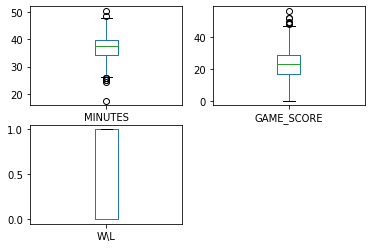

In [531]:
#Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

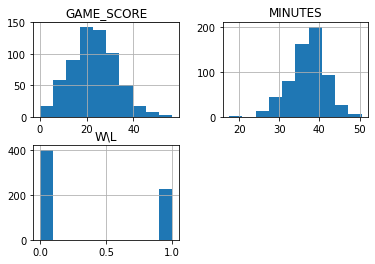

In [532]:
#histograms
dataset.hist()
pyplot.show()

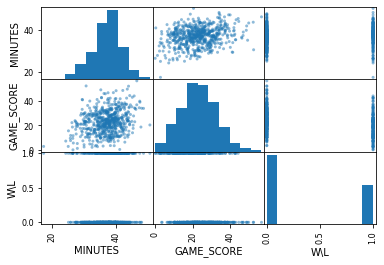

In [533]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [546]:
#split-out validation
array = dataset.values
X = array[:,0:1]
y =array[:,1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


ValueError: Dimensions of labels and X must be compatible

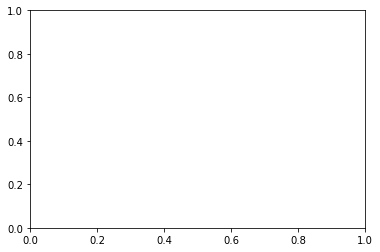

In [547]:
#Compare Algos
pyplot.boxplot(results, labels=names)
pyplot.title("Algorithm Comp")
pyplot.show()

In [377]:
#Predicitions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [378]:
#Evaluation predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.015873015873015872
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00     

C:\Users\Cody\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cody\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
